## Amazon Review

Sentiment analysis is a machine learning model used for understanding natural languages. It is used for identifying the feeling behind a particular text, i.e. whether the text means happy, sad, angry and so on.

This could be used in multiple scenarios like a big brand don't need to go through every review to know how it's users are reacting. Whether they can run sentiment analysis to extract the feeling information for their brand.

Here, we will be building such model from amazon's review dataset and we'll use Random Forest for this task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.feature_extraction import text
from sklearn.model_selection import cross_val_score, GridSearchCV
from nltk.corpus import stopwords

%matplotlib inline

In [2]:
df = pd.read_json('~/Downloads/Tools_and_Home_Improvement_5.json', lines=True)

In [3]:
df_test = pd.read_json('~/Downloads/Cell_Phones_and_Accessories_5.json', lines=True)

In [4]:
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,104800001X,"[0, 1]",5,"I hate it when my shirt collars, not otherwise...","01 29, 2014",A4IL0CLL27Q33,D. Brennan,Perfect for collar stay management,1390953600
1,104800001X,"[0, 0]",5,These little magnets are really powerful for t...,"05 31, 2013",A3Q5W5E7TDVLJF,funnyc130,Neat,1369958400
2,104800001X,"[0, 0]",5,I wanted something this small to mount on the ...,"03 13, 2013",A37KNOJXE2FU6,Joseph Yonke II,Very small and thin,1363132800
3,104800001X,"[0, 0]",5,I use these to magnetize my Warhammer 40K mini...,"06 16, 2013",A3U4AFML9SZPWK,"Leith Tussing ""I like tacos.""",Excellent hobby magnets,1371340800
4,104800001X,"[23, 25]",5,They are soo freaking annoying!! Why?! You sp...,"08 9, 2013",A36Y7X194VWVKA,Mark D.,They're annoying... which is why they get five...,1376006400


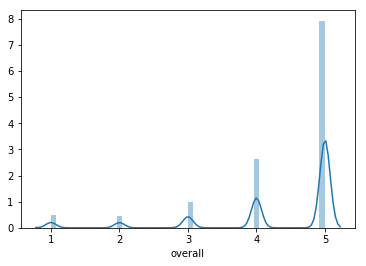

In [5]:
sns.distplot(df['overall'])

### Converting text to features

First we need to convert our text to features and then pass it to model. We need to use Vectorization, which will convert text to features using different algorithms. We will compare 3 different Vectorization techniques here:

    1. tf-idf vectorization
    2. count vectorization

### TFIDF Vectorizer

TFIDF vectorizer converts text to vectors such that count of words per sentence is divided by count of word in the document. Which gives more information about important words and less information for repeating words.

In [6]:
tfidf_vectorizer = text.TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidf_vectorizer.fit(df['reviewText'])
X = tfidf_vectorizer.transform(df['reviewText']).toarray()

In [7]:
Y = df['overall']

In [8]:
print(X[:100000].shape)
print(Y[100000:].shape)

(100000, 1500)
(34476,)


In [9]:
X_test = tfidf_vectorizer.transform(df_test['reviewText']).toarray()
Y_test = df_test['overall']

In [10]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=3)
param_grid = {
    'n_estimators': [20, 30, 40, 50, 60],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc_tfidf = GridSearchCV(rfc, param_grid=param_grid, cv=5)
CV_rfc_tfidf.fit(X, Y)
print("Best Parameters: ", CV_rfc_tfidf.best_params_)
print("Model score on tfidf vectorizer: ", CV_rfc_tfidf.score(X, Y))
print("Cross validation: ", cross_val_score(CV_rfc_tfidf, X, Y, cv=5))
print("Model score on test data after tfidf vectorizer: ", CV_rfc_tfidf.score(X_test, Y_test))

Best Parameters:  {'max_features': 'auto', 'n_estimators': 20}
Model score on tfidf vectorizer:  0.6340610964038192
Cross validation:  [0.63402483 0.6340348  0.63405838 0.63408195 0.63410553]
Model score on test data after tfidf vectorizer:  0.5588590766255741


### Count Vectorizer

It gives count matrix for each word in dataset. Count vectorizer uses alot of memory to parse this much data. So, we will fit our model using first 100000 entries.

In [11]:
count_vectorizer = text.CountVectorizer(ngram_range=(1, 3))
count_vectorizer.fit(df['reviewText'][:100000])
X = count_vectorizer.transform(df['reviewText'][:100000])
Y = df['overall'][:100000]

In [12]:
X_test = count_vectorizer.transform(df_test['reviewText'][:100000])
Y_test = df_test['overall'][:100000]

In [16]:
rfc = RandomForestClassifier(n_estimators=20, max_depth=3)
param_grid = {
    'n_estimators': [20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc_count = GridSearchCV(rfc, param_grid=param_grid, cv=5)
CV_rfc_count.fit(X, Y)
print("Best Parameters: ", CV_rfc_count.best_params_)
print("Model score on count vectorizer: ", CV_rfc_count.score(X, Y))
print("Cross validation: ", cross_val_score(CV_rfc_count, X, Y, cv=5))
print("Model score on test data after count vectorizer: ", CV_rfc_count.score(X_test, Y_test))

Best Parameters:  {'max_features': 'auto', 'n_estimators': 20}
Model score on count vectorizer:  0.64002
Cross validation:  [0.63995401 0.640018   0.640032   0.640032   0.64006401]
Model score on test data after count vectorizer:  0.53665


## Conclusion

We have used same type of model for our vectorizers. So, we can say that accuracy is not affected by model but mainly by the method of vectorization used. Both the methods perform almost similar to each other.

But something interesting is happening here. Tfidf vectorizer gives less score for training dataset but it's score on test dataset is higher than count vectorizer.